In [1]:
#Alllllll the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer


**fill in the missing values with KNN**  


load the 'LoanApprovalPrediction.csv' into a data frame  
and inspect it. look at data types, nulls etc. 
finally- create a of code that will return a table (named null_info) with tne names, data types and null percentage of all the columns that have null values in them. makes sure the data is sorted by precentage in ascending order

In [2]:
df = pd.read_csv('datasets/LoanApprovalPrediction.csv')

In [3]:
#null columns "the problematic columns"
null_columns = df.isnull().sum() [df.isnull().sum() != 0].index
#df.isnull().sum() [df.isnull().sum() != 0].index

In [4]:
#what are the nullp  pcts of the "problematic culumns"
null_percent = (df.isnull().sum().loc[null_columns]/df.shape[0])*100
#(df.isnull().sum().loc[null_columns]/df.shape[0])*100

In [5]:
#what is loc & iloc
df.isnull().sum().loc['Dependents']
df.isnull().sum().iloc[3]


12

In [6]:
#number of null in each
how_many_nulls = df.isnull().sum() [df.isnull().sum() != 0].values
#df.isnull().sum() [df.isnull().sum() != 0].values

In [7]:
columns_dtype = df.dtypes.loc[null_columns]
#df.dtypes.loc[null_columns]

In [8]:
null_info = pd.DataFrame({"null_columns":null_columns,
                          "how_many_nulls":how_many_nulls,
                          "columns_dtype":columns_dtype,
                          "null_percent": null_percent    
})

In [9]:
null_info.reset_index(drop =True, inplace =True)

In [10]:
null_info

,null_columns,how_many_nulls,columns_dtype,null_percent
0,Dependents,12,float64,2.006689
1,LoanAmount,21,float64,3.511706
2,Loan_Amount_Term,14,float64,2.341137
3,Credit_History,49,float64,8.193980


before we go on- make a copy of the data frame for later analysis  
call it `df_copy`

In [11]:
df_copy = df.copy()

If all the missing values are less then 10% you may use the KNN iputer to fill out the missing data.
Please make sure you only use numeric data and that you scale the data first.  
 Use Standard Scaler

In [12]:
numeric_data = df.select_dtypes ('number')

In [13]:
numeric_cols = df.select_dtypes ('number').columns

In [14]:
numeric_cols

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [15]:
#Scaling the data
scaler = StandardScaler()
scaled = scaler.fit_transform(numeric_data)

In [16]:
#KNN!!!!
imputer = KNNImputer()
imputed = imputer.fit_transform(scaled)

In [17]:
inversed = scaler.inverse_transform(imputed)

In [18]:
df[numeric_cols] =inversed

In [28]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.0,-2.273737e-13,165.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1.508000e+03,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,-2.273737e-13,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583.0,2.358000e+03,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000.0,-2.273737e-13,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900.0,-2.273737e-13,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106.0,-2.273737e-13,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072.0,2.400000e+02,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583.0,-2.273737e-13,187.0,360.0,1.0,Urban,Y


In [19]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
df_copy.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

**Check the quality of the KNN imputatio**  
- Create a KDE plot (using the Seaborn library) for "Credit_History" before imputation and compare it with the one after.
- Compare the mean, median, and standard deviation (std) of all the relevant columns before and after imputation. If the std is significantly lower, it means the data was incorrectly flattened.

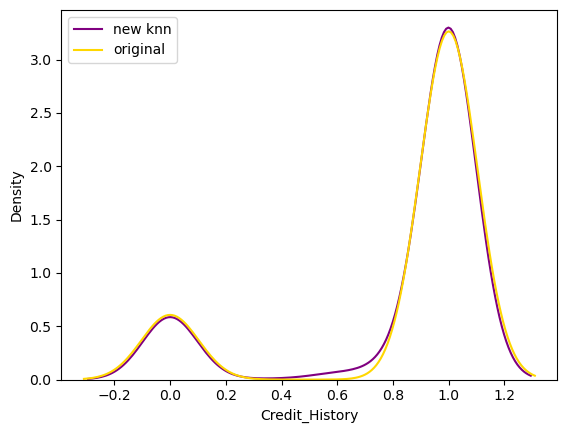

In [21]:
sns.kdeplot(df['Credit_History'], label ="new knn", color = 'purple')
sns.kdeplot(df_copy['Credit_History'].dropna(), label ="original", color = 'gold')
plt.legend()
plt.show()

In [22]:
before = df_copy[null_columns].describe().loc['std']
after = df[null_columns].std()

In [23]:
df_copy[null_columns].describe().loc['std']

Dependents           1.007751
LoanAmount          82.704182
Loan_Amount_Term    65.205994
Credit_History       0.363800
Name: std, dtype: float64

In [24]:
df_copy[null_columns].std()

Dependents           1.007751
LoanAmount          82.704182
Loan_Amount_Term    65.205994
Credit_History       0.363800
dtype: float64

In [25]:
df[null_columns].std()

Dependents           0.998281
LoanAmount          81.683986
Loan_Amount_Term    64.682065
Credit_History       0.352398
dtype: float64

In [26]:
delta = before -after

In [27]:
pd.DataFrame({
    "before":before,
    "after":after,
    "delta": delta
}).reset_index()

,index,before,after,delta
0,Dependents,1.007751,0.998281,0.009470
1,LoanAmount,82.704182,81.683986,1.020196
2,Loan_Amount_Term,65.205994,64.682065,0.523929
3,Credit_History,0.363800,0.352398,0.011402
